In [1]:
import numpy as np
import xarray as xr
import pandas as pd
from salishsea_tools import viz_tools, places, visualisations
from matplotlib import pyplot as plt, dates
from datetime import datetime, timedelta
from calendar import month_name
from scipy.io import loadmat
from tqdm.notebook import tqdm
from salishsea_tools import nc_tools
from dask.diagnostics import ProgressBar
import cmocean

%matplotlib inline

In [2]:
plt.rcParams.update({'font.size': 12, 'axes.titlesize': 'medium'})

### Plot Seasonal Cycles for Individual Years

In [3]:

#years, months, data
monthly_array_diatoms_depthint_slice = np.zeros([14,12,50,50])
# Load monthly averages
mask = xr.open_dataset('/data/eolson/results/MEOPAR/NEMO-forcing-new/grid/mesh_mask201702.nc')
slc = {'y': slice(450,500), 'x': slice(250,300)}
e3t, tmask = [mask[var].isel(z=slice(None, 27),**slc).values for var in ('e3t_0', 'tmask')]
years, variables = range(2007, 2021), ['diatoms']
# Temporary list dict
data = {}
# Permanent aggregate dict
aggregates = {var: {} for var in variables}
monthlydat = {var: {} for var in variables}

# Loop through years
for year in [2007,2008,2009,2010,2011,2012,2016,2017,2018,2020]:
    # Initialize lists
    for var in variables: data[var] = []
    # Load monthly averages
    for month in range(1, 13):
        datestr = f'{year}{month:02d}'
        prefix = f'/data/sallen/results/MEOPAR/v201905r/SalishSea_1m_{datestr}_{datestr}'
        
        # Load grazing variables
        with xr.open_dataset(prefix + '_ptrc_T.nc') as ds:
            q = np.ma.masked_where(tmask == 0, ds[var].isel(deptht=slice(None, 27), **slc).values * e3t).sum(axis=1).data
            q2 = q[0,:,:]
            monthly_array_diatoms_depthint_slice[year-2007,month-1,:,:] = q2 #year2015 is index 0 along 1st dimension
            for var in ['diatoms']:
                data[var].append(np.ma.masked_where(tmask == 0, ds[var].isel(deptht=slice(None, 27), **slc).values * e3t).sum(axis=1).data)
    
    # Concatenate months
    for var in variables: aggregates[var][year] = np.concatenate(data[var]).mean(axis=0)

# Loop through years for wrap files
for year in [2013,2014,2015]:
    # Initialize lists
    for var in variables: data[var] = []
    # Load monthly averages
    for month in range(1, 13):
        datestr = f'{year}{month:02d}'
        prefix = f'/data/sallen/results/MEOPAR/v201905r_wrap/SalishSea_1m_{datestr}_{datestr}'
        
        # Load grazing variables
        with xr.open_dataset(prefix + '_ptrc_T.nc') as ds:
            q = np.ma.masked_where(tmask == 0, ds[var].isel(deptht=slice(None, 27), **slc).values * e3t).sum(axis=1).data
            q2 = q[0,:,:]
            monthly_array_diatoms_depthint_slice[year-2007,month-1,:,:] = q2 #year2015 is index 0 along 1st dimension
            for var in ['diatoms']:
                data[var].append(np.ma.masked_where(tmask == 0, ds[var].isel(deptht=slice(None, 27), **slc).values * e3t).sum(axis=1).data)
    
    # Concatenate months
    for var in variables: aggregates[var][year] = np.concatenate(data[var]).mean(axis=0)

        
# Add experiment year
for year in [2019]:
    # Initialize lists
    for var in variables: data[var] = []
    # Load monthly averages
    for month in range(1, 7):
        datestr = f'{year}{month:02d}'
        prefix = f'/data/sallen/results/MEOPAR/Karyn/01jan19_river08/SalishSea_1m_{datestr}_{datestr}'
    
        # Load grazing variables
        with xr.open_dataset(prefix + '_ptrc_T.nc') as ds:
            q = np.ma.masked_where(tmask == 0, ds[var].isel(deptht=slice(None, 27), **slc).values * e3t).sum(axis=1).data
            q2 = q[0,:,:]
            monthly_array_diatoms_depthint_slice[year-2007,month-1,:,:] = q2 #year2015 is index 0 along 1st dimension
            for var in ['diatoms']:
                data[var].append(np.ma.masked_where(tmask == 0, ds[var].isel(deptht=slice(None, 27), **slc).values * e3t).sum(axis=1).data)

for year in [2019]:
    # Initialize lists
    for var in variables: data[var] = []
    # Load monthly averages
    for month in range(7, 10):
        datestr = f'{year}{month:02d}'
        prefix = f'/data/sallen/results/MEOPAR/Karyn/01jul19_river08/SalishSea_1m_{datestr}_{datestr}'
    
        # Load grazing variables
        with xr.open_dataset(prefix + '_ptrc_T.nc') as ds:
            q = np.ma.masked_where(tmask == 0, ds[var].isel(deptht=slice(None, 27), **slc).values * e3t).sum(axis=1).data
            q2 = q[0,:,:]
            monthly_array_diatoms_depthint_slice[year-2007,month-1,:,:] = q2 #year2015 is index 0 along 1st dimension
            for var in ['diatoms']:
                data[var].append(np.ma.masked_where(tmask == 0, ds[var].isel(deptht=slice(None, 27), **slc).values * e3t).sum(axis=1).data)
            
        
# # Calculate 5 year mean and anomalies
# for var in variables:
#     aggregates[var][‘mean’] = np.concatenate([aggregates[var][year][None, ...] for year in years]).mean(axis=0)
#     for year in years: aggregates[var][year] = aggregates[var][year] - aggregates[var][‘mean’]



In [4]:
monthly_array_diatoms_depthint_slice[monthly_array_diatoms_depthint_slice == 0 ] = np.nan
monthly_array_diatoms_depthint_slicemean = \
np.nanmean(np.nanmean(monthly_array_diatoms_depthint_slice, axis = 2),axis = 2)
print(np.shape(monthly_array_diatoms_depthint_slicemean))

(14, 12)


/tmp/ipykernel_1102826/2320522072.py:3: RuntimeWarning: Mean of empty slice
  np.nanmean(np.nanmean(monthly_array_diatoms_depthint_slice, axis = 2),axis = 2)


In [5]:
monthly_array_diatoms_depthint_slicemean

array([[ 0.25420452,  0.16620927,  0.92660182, 30.02499063, 30.60558687,
        17.73600106, 12.11028319,  5.05368401,  3.46800389,  0.34788397,
         0.4564357 ,  0.3767686 ],
       [ 0.23982064,  0.17371493,  3.13439335, 38.20802266, 35.26040455,
        20.78222047, 19.78868161, 10.83708083,  9.15037476,  1.56574763,
         0.69712752,  0.49628067],
       [ 0.28083072,  0.29122968,  2.92895699, 40.92101987, 28.27402305,
        16.33924653, 19.3655208 , 11.79516908,  2.82406387,  1.56675844,
         0.68229068,  0.48228685],
       [ 0.24977545,  0.14706295,  4.44656872, 33.09469851, 30.16931664,
        17.67569401, 16.72736252, 16.40960347,  7.28607039,  1.86591617,
         1.23962421,  0.67896491],
       [ 0.39787293,  0.19386772,  0.50420795,  8.03314251, 33.06997899,
        19.46577145,  9.79638728,  4.04993755,  3.45691521,  0.86755221,
         0.86929704,  0.74799625],
       [ 0.38555823,  0.24206305,  1.05099239, 24.80959449, 33.1924934 ,
        21.83003552,  

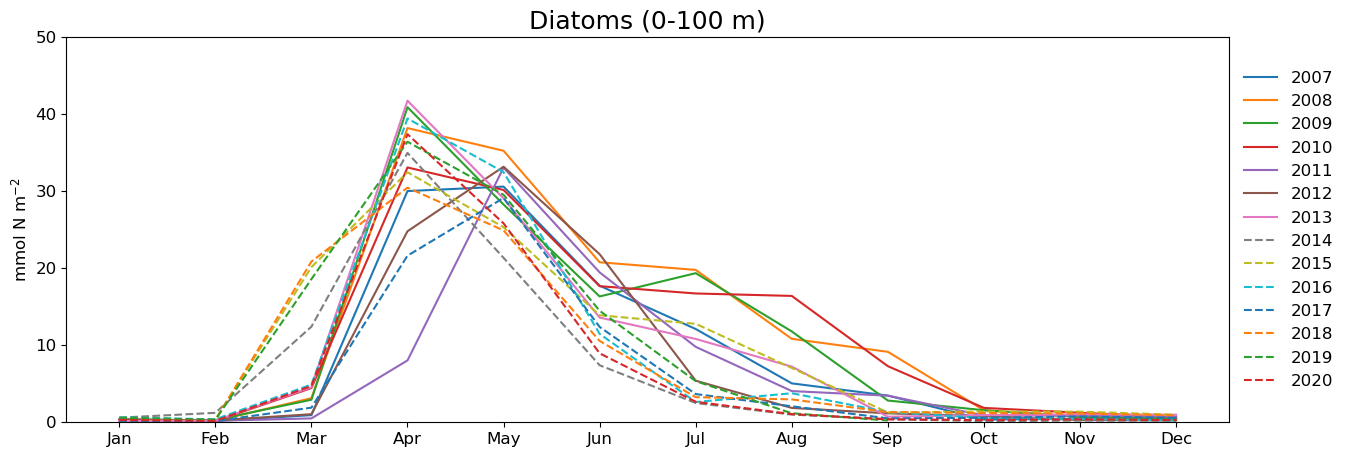

In [6]:


#plot monthly means for 5 years
fig, ax = plt.subplots(figsize=(15, 5))
bbox = {'boxstyle': 'round', 'facecolor': 'w', 'alpha': 0.9}
cmap = plt.get_cmap('tab10')
palette = [cmap(0), cmap(0.2), 'k', cmap(0.1), cmap(0.3)]
xticks=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov',"Dec"]

for i in range(0,7):
    ax.plot(xticks, monthly_array_diatoms_depthint_slicemean[i,:],label=2007+i)
    ax.set_title('Central SoG Diatom Seasonal Cycle',fontsize=18)
    ax.legend(frameon=False)
    ax.set_ylim(0,125)
    ax.set_ylabel('\u03bcmol N m$^{-2}$')
   
for i in range(7,14):
    ax.plot(xticks, monthly_array_diatoms_depthint_slicemean[i,:],linestyle='--',label=2007+i)
    ax.set_title('Diatoms (0-100 m)',fontsize=18)
    ax.legend(frameon=False,loc='center left',bbox_to_anchor=(1, 0.5))
    ax.set_ylim(0,50)
    ax.set_ylabel('mmol N m$^{-2}$')


Text(0, 0.5, 'mmol N m$^{-2}$')

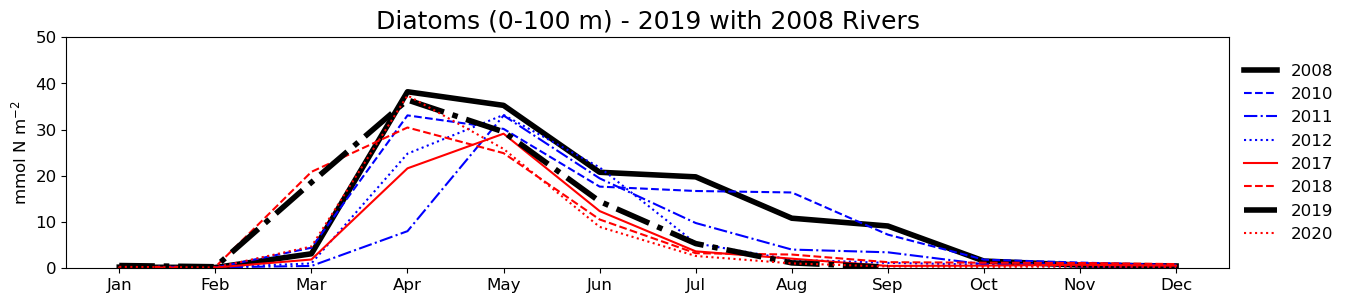

In [7]:
fig, ax = plt.subplots(figsize=(15, 3))
bbox = {'boxstyle': 'round', 'facecolor': 'w', 'alpha': 0.9}
cmap = plt.get_cmap('tab10')
palette = [cmap(0), cmap(0.2), 'k', cmap(0.1), cmap(0.3)]
xticks=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov',"Dec"]

ax.plot(xticks, monthly_array_diatoms_depthint_slicemean[1,:],color='k',linestyle='-',label='2008',linewidth=4)
ax.plot(xticks, monthly_array_diatoms_depthint_slicemean[3,:],color='b',linestyle='--',label='2010')
ax.plot(xticks, monthly_array_diatoms_depthint_slicemean[4,:],color='b',linestyle='-.',label='2011')
ax.plot(xticks, monthly_array_diatoms_depthint_slicemean[5,:],color='b',linestyle=':',label='2012')
ax.plot(xticks, monthly_array_diatoms_depthint_slicemean[10,:],color='r',linestyle='-',label='2017')
ax.plot(xticks, monthly_array_diatoms_depthint_slicemean[11,:],color='r',linestyle='--',label='2018')
ax.plot(xticks, monthly_array_diatoms_depthint_slicemean[12,:],color='k',linestyle='-.',label='2019',linewidth=4)
ax.plot(xticks, monthly_array_diatoms_depthint_slicemean[13,:],color='r',linestyle=':',label='2020')

ax.set_title('Diatoms (0-100 m) - 2019 with 2008 Rivers',fontsize=18)
ax.legend(frameon=False,loc='center left',bbox_to_anchor=(1, 0.5))
ax.set_ylim(0,50)
ax.set_ylabel('mmol N m$^{-2}$')

In [8]:
monthly_array_diatoms_depthint_slicemean[12,:]

array([ 0.59493904,  0.33394202, 18.59525145, 36.43343026, 29.54134366,
       14.48030793,  5.3428152 ,  1.16946624,  0.2310269 ,         nan,
               nan,         nan])

In [9]:

#years, months, data
monthly_array_diatoms_orig_slice = np.zeros([14,12,50,50])
# Load monthly averages
mask = xr.open_dataset('/data/eolson/results/MEOPAR/NEMO-forcing-new/grid/mesh_mask201702.nc')
slc = {'y': slice(450,500), 'x': slice(250,300)}
e3t, tmask = [mask[var].isel(z=slice(None, 27),**slc).values for var in ('e3t_0', 'tmask')]
years, variables = range(2007, 2021), ['diatoms']
# Temporary list dict
data = {}
# Permanent aggregate dict
aggregates = {var: {} for var in variables}
monthlydat = {var: {} for var in variables}

### 2008 using higher temperature threshold       
# Add experiment year
for year in [2008]:
    # Initialize lists
    for var in variables: data[var] = []
    # Load monthly averages
    for month in range(1, 13):
        datestr = f'{year}{month:02d}'
        prefix = f'/data/sallen/results/MEOPAR/v201905r/SalishSea_1m_{datestr}_{datestr}'
    
        # Load grazing variables
        with xr.open_dataset(prefix + '_ptrc_T.nc') as ds:
            q = np.ma.masked_where(tmask == 0, ds[var].isel(deptht=slice(None, 27), **slc).values * e3t).sum(axis=1).data
            q2 = q[0,:,:]
            monthly_array_diatoms_orig_slice[year-2007,month-1,:,:] = q2 #year2015 is index 0 along 1st dimension
            for var in ['diatoms']:
                data[var].append(np.ma.masked_where(tmask == 0, ds[var].isel(deptht=slice(None, 27), **slc).values * e3t).sum(axis=1).data)

                
              
# Add experiment year
for year in [2019]:
    # Initialize lists
    for var in variables: data[var] = []
    # Load monthly averages
    for month in range(1, 13):
        datestr = f'{year}{month:02d}'
        prefix = f'/data/sallen/results/MEOPAR/v201905r/SalishSea_1m_{datestr}_{datestr}'
    
        # Load grazing variables
        with xr.open_dataset(prefix + '_ptrc_T.nc') as ds:
            q = np.ma.masked_where(tmask == 0, ds[var].isel(deptht=slice(None, 27), **slc).values * e3t).sum(axis=1).data
            q2 = q[0,:,:]
            monthly_array_diatoms_orig_slice[year-2007,month-1,:,:] = q2 #year2015 is index 0 along 1st dimension
            for var in ['diatoms']:
                data[var].append(np.ma.masked_where(tmask == 0, ds[var].isel(deptht=slice(None, 27), **slc).values * e3t).sum(axis=1).data)




In [10]:
monthly_array_diatoms_orig_slice[monthly_array_diatoms_orig_slice == 0 ] = np.nan
monthly_array_diatoms_orig_slicemean = \
np.nanmean(np.nanmean(monthly_array_diatoms_orig_slice, axis = 2),axis = 2)
print(np.shape(monthly_array_diatoms_orig_slicemean))

(14, 12)


/tmp/ipykernel_1102826/3403781678.py:3: RuntimeWarning: Mean of empty slice
  np.nanmean(np.nanmean(monthly_array_diatoms_orig_slice, axis = 2),axis = 2)


In [ ]:
fig, ax = plt.subplots(figsize=(15, 3))
bbox = {'boxstyle': 'round', 'facecolor': 'w', 'alpha': 0.9}
cmap = plt.get_cmap('tab10')
palette = [cmap(0), cmap(0.2), 'k', cmap(0.1), cmap(0.3)]
xticks=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov',"Dec"]


ax.plot(xticks, monthly_array_diatoms_orig_slicemean[12,:],color='r',linestyle='-',label='Original 2019')
ax.plot(xticks, monthly_array_diatoms_depthint_slicemean[12,:],color='k',linestyle='-.',label='2019 with 2008 Rivers')


ax.set_title('Experiment - WY Diatoms with CY Rivers',fontsize=18)
ax.legend(frameon=False,loc=1)
ax.set_ylim(0,40)
ax.set_ylabel('mmol N m$^{-2}$')

Text(0, 0.5, 'mmol N m$^{-2}$')